In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Klasifikasi dataset

In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.load("horses_or_humans", split=["train[:70%]", "train[:30%]"], batch_size=-1, as_supervised=True)

# encoding label pada gambar

In [4]:
num_class = 2

# ONE HOT ENCODING
y_train = keras.utils.to_categorical(y_train_raw, num_class)
y_test = keras.utils.to_categorical(y_test_raw, num_class)

# preview gambar

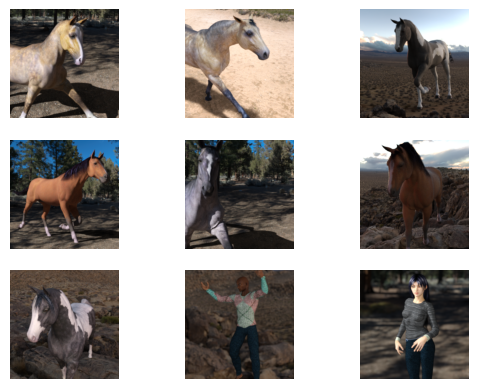

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [6]:
x_train_raw.shape

TensorShape([719, 300, 300, 3])

In [7]:
x_test_raw.shape #y train hanya berisi label

TensorShape([308, 300, 300, 3])

In [8]:
x_train = tf.image.resize(x_train_raw, (28,28))
x_test = tf.image.resize(x_test_raw, (28,28))

In [9]:
x_train = np.reshape(x_train.numpy(), (719, 2352))
x_test = np.reshape(x_test.numpy(), (308,2352))

In [10]:
# Normalisasi piksel pada gambar

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# Membuat DNN

In [11]:
model = Sequential(
    [
        Dense(512, activation='relu', input_dim = (2352)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(2, activation='sigmoid') #disesuaikan dengan klasifikasi, khusus output, kalau 2 output pakai sigmoid
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1204736   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1,369,218
Trainable params: 1,369,218
Non-trainable params: 0
_________________________________________________________________


# Optimisasi Model

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting Training Model

In [14]:
data = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
12/12 [==============================] - 2s 64ms/step - loss: 0.7039 - accuracy: 0.5800 - val_loss: 0.5512 - val_accuracy: 0.7760
Epoch 2/10
12/12 [==============================] - 0s 24ms/step - loss: 0.5871 - accuracy: 0.6606 - val_loss: 0.5754 - val_accuracy: 0.6818
Epoch 3/10
12/12 [==============================] - 0s 25ms/step - loss: 0.4925 - accuracy: 0.7483 - val_loss: 0.3914 - val_accuracy: 0.8312
Epoch 4/10
12/12 [==============================] - 0s 27ms/step - loss: 0.3969 - accuracy: 0.8261 - val_loss: 0.4316 - val_accuracy: 0.7760
Epoch 5/10
12/12 [==============================] - 0s 27ms/step - loss: 0.3839 - accuracy: 0.8220 - val_loss: 0.3104 - val_accuracy: 0.8604
Epoch 6/10
12/12 [==============================] - 0s 25ms/step - loss: 0.2920 - accuracy: 0.8748 - val_loss: 0.2848 - val_accuracy: 0.8604
Epoch 7/10
12/12 [==============================] - 0s 27ms/step - loss: 0.2676 - accuracy: 0.8943 - val_loss: 0.3339 - val_accuracy: 0.8344
Epoch 8/10
12

# Evaluasi Model yang telah di train

In [15]:
# batch size 128
score = model.evaluate(x_test, y_test)
print("TEST LOSS          : ", score[0])
print("TEST ACCURACY      : ", score[1])
print("VALIDATION LOSS    :",data.history['val_loss'][-1])
print("VALIDATION ACCURACY:",data.history['val_accuracy'][-1])

10/10 [==============================] - 0s 9ms/step - loss: 0.1145 - accuracy: 0.9708
TEST LOSS          :  0.11449368298053741
TEST ACCURACY      :  0.9707792401313782
VALIDATION LOSS    : 0.11449368298053741
VALIDATION ACCURACY: 0.9707792401313782
